# Example Notebook for TAFT
## Time alignment for tiles 

In [1]:
%cd ..

/home/maximilian/Github/melp


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from melp import Detector
import melp.taft

Welcome to JupyROOT 6.24/06


## Creating/Loading detector with misalignment

In [4]:
mu3e_detector = Detector.initFromROOT("./run42_20000.root")
#mu3e_detector = Detector.initFromSave("./save_file_3mio_iter2.taft")

------------------------------
Detector information

Stats:
  - Tiles:  5824
    -> misal:  True
  - Pixel Modules:  2844
  - Loaded Runs (Tiles):  []
  - Loaded Runs (Pixel):  []
------------------------------


In [5]:
melp.taft.select(mu3e_detector)

In [6]:
options={"ttree_loc": "alignment/mu3e"}

hist, hist_2 = melp.taft.find_cosmic_events("../../Downloads/mu3e_sorted_000002_cosmic.root",**options)

0.0
0.020000640020480655
0.04000128004096131
0.06000192006144196
0.08000256008192262
0.10000320010240328
0.12000384012288393
0.14000448014336458
0.16000512016384524
0.1800057601843259
0.20000640020480656
0.22000704022528722
0.24000768024576785
0.26000832026624854
0.28000896028672917
0.30000960030720986
0.3200102403276905
0.3400108803481711
0.3600115203686518
0.38001216038913244
0.4000128004096131
0.42001344043009375
0.44001408045057444
0.46001472047105507
0.4800153604915357
0.5000160005120163
0.5200166405324971
0.5400172805529777
0.5600179205734583
0.580018560593939
0.6000192006144197
0.6200198406349003
0.640020480655381
0.6600211206758616
0.6800217606963422
0.700022400716823
0.7200230407373036
0.7400236807577842
0.7600243207782649
0.7800249607987456
0.8000256008192262
0.8200262408397069
0.8400268808601875
0.8600275208806681
0.8800281609011489
0.9000288009216295
0.9200294409421101
0.9400300809625908
0.9600307209830714
0.9800313610035521
3820323  von  4999840


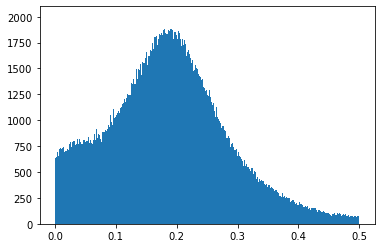

In [7]:
plt.hist(hist, bins=1000, range=(0,0.5))
plt.ylim(ymax = 2100, ymin = 0)
plt.show()

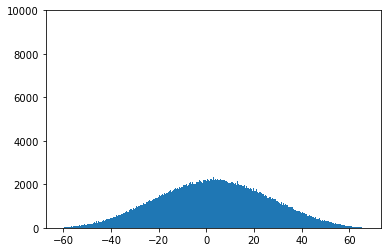

In [8]:
plt.hist(hist_2, bins=2000)#, range=(-10,10))
plt.ylim(ymax = 10000, ymin = 0)
plt.show()

In [12]:
print(np.median(hist_2))
print(1/np.sqrt(len(hist_2)))

3.0118623971939087
0.0006952642169473248
